# Estudo sobre dados retirados do Neo4j

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
import os
import csv
from collections import OrderedDict
pd.set_option("display.max_rows", 2000)
warnings.filterwarnings("ignore")

In [2]:
#Lendo o arquivo e criando um dataframe
df = pd.read_csv('./dataset_analysis/dataset_2.csv', low_memory=False)
#df = df.astype('category')
df.head(10)


,identificacao,estado,qtdEstado,mesRefe
0,16112650429,"[MG,DF]",2,201303
1,16189810986,"[GO,DF]",2,201303
2,16460835889,"[MG,DF]",2,201303
3,12000654365,"[GO,DF]",2,201303
4,16440022211,"[GO,DF]",2,201303
5,12516841126,"[GO,DF]",2,201301
6,16476546539,"[GO,DF]",2,201301
7,12522299702,"[GO,DF]",2,201302
8,12522299702,"[GO,DF]",2,201301
9,16381859084,"[GO,DF]",2,201302


In [3]:
#Removendo colchetes
df['estado'] = df['estado'].str.strip('[]').astype(str)


In [6]:
df.head(1000)

,identificacao,estado,qtdEstado,mesRefe
0,16112650429,"MG,DF",2,201303
1,16189810986,"GO,DF",2,201303
2,16460835889,"MG,DF",2,201303
3,12000654365,"GO,DF",2,201303
4,16440022211,"GO,DF",2,201303
5,12516841126,"GO,DF",2,201301
6,16476546539,"GO,DF",2,201301
7,12522299702,"GO,DF",2,201302
8,12522299702,"GO,DF",2,201301
9,16381859084,"GO,DF",2,201302


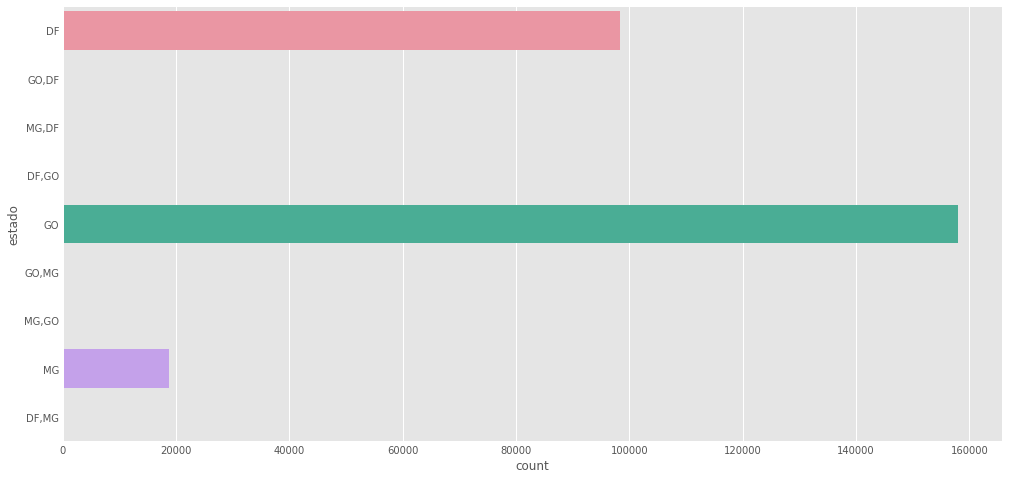

In [39]:
# Contagem de Amostras por Estado:
plt.figure(1 , figsize = (15 , 8))
sns.countplot(y = 'estado' , data = df)
plt.show()

In [40]:
#Criando dataframe go_df
go_df = df.loc[(df['estado']) == 'GO,DF']

In [41]:
go_df.shape


(150, 3)

In [42]:
#Criando dataframe go_mg
go_mg = df.loc[(df['estado']) == 'GO,MG']

In [43]:
go_mg.shape

(16, 3)

In [44]:
#Criando dataframe df_mg
df_mg = df.loc[(df['estado']) == 'DF,MG']

In [45]:
df_mg.shape

(2, 3)

In [46]:
#Criando dataframe df_go
df_go = df.loc[(df['estado']) == 'DF,GO']

In [47]:
df_go.shape

(25, 3)

In [48]:
#Criando dataframe mg_go
mg_go = df.loc[(df['estado']) == 'MG,GO']
mg_go.shape


(1, 3)

In [49]:
#Criando dataframe mg_go
mg_df = df.loc[(df['estado']) == 'MG,DF']
mg_df.shape

(7, 3)

In [50]:
#Juntando os dataframes
df_1 = pd.merge(go_df,go_mg, on = ['identificacao','estado','qtdEstado'], how="outer")
df_2 = pd.merge(mg_df,mg_go, on = ['identificacao','estado','qtdEstado'], how="outer")
df_3 = pd.merge(df_go,df_mg, on = ['identificacao','estado','qtdEstado'], how="outer")
df_12 = pd.merge(df_1,df_2, on = ['identificacao','estado','qtdEstado'], how="outer")
df_estados = pd.merge(df_12,df_3, on = ['identificacao','estado','qtdEstado'], how="outer")


In [51]:
df_estados.shape

(201, 3)

In [52]:
df_estados.groupby('estado').count()

,identificacao,qtdEstado
estado,,
"DF,GO",25,25
"DF,MG",2,2
"GO,DF",150,150
"GO,MG",16,16
"MG,DF",7,7
"MG,GO",1,1


In [53]:
gp = df_estados.groupby(['estado'])
gp.head(1)

,identificacao,estado,qtdEstado
0,21265277372,"GO,DF",2
150,16669310677,"GO,MG",5
166,16112650429,"MG,DF",4
173,16011383425,"MG,GO",2
174,12522299702,"DF,GO",5
199,16591042963,"DF,MG",2


In [54]:
df2 = df_estados

In [55]:
df2['qtd'] = 0

In [56]:
df2.groupby('estado').count()

,identificacao,qtdEstado,qtd
estado,,,
"DF,GO",25,25,25
"DF,MG",2,2,2
"GO,DF",150,150,150
"GO,MG",16,16,16
"MG,DF",7,7,7
"MG,GO",1,1,1


In [57]:
data  = OrderedDict({
    'Estado':['DF-GO','DF-MG','GO-DF','GO-MG','MG-DF','MG-GO'],
    'Qtd':[25,2,150,16,7,1]
})
df_qtd = pd.DataFrame(data)
df_qtd

,Estado,Qtd
0,DF-GO,25
1,DF-MG,2
2,GO-DF,150
3,GO-MG,16
4,MG-DF,7
5,MG-GO,1


In [64]:
df2

,identificacao,estado,qtdEstado,qtd
0,21265277372,"GO,DF",2,0
1,16136756340,"GO,DF",2,0
2,21204799646,"GO,DF",2,0
3,13161402277,"GO,DF",2,0
4,16136743508,"GO,DF",2,0
5,13011338816,"GO,DF",2,0
6,21240645742,"GO,DF",2,0
7,13081937271,"GO,DF",3,0
8,16153414622,"GO,DF",2,0
9,20409466047,"GO,DF",2,0


## Visualização

In [58]:
#print(list(df_qtd['Estado']))
y_axis = (df_qtd['Qtd'].values)
x_axis = list(df_qtd['Estado'])
width_n = 0.3



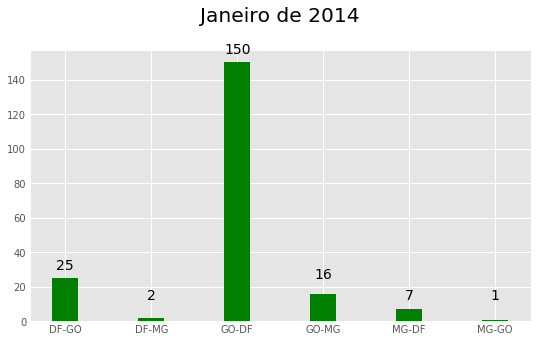

In [59]:
plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width=width_n, color='green')
plt.style.use('fivethirtyeight')
plt.title('Janeiro de 2014', y = 1.08)
plt.annotate(df_qtd.loc[0,'Qtd'], xy=('DF-GO',df_qtd.loc[0,'Qtd'] * (1.2)), ha='center')
plt.annotate(df_qtd.loc[1,'Qtd'], xy=('DF-MG',df_qtd.loc[0,'Qtd'] * (.5)), ha='center')
plt.annotate(df_qtd.loc[2,'Qtd'], xy=('GO-DF',df_qtd.loc[0,'Qtd'] * (6.2)), ha='center')
plt.annotate(df_qtd.loc[3,'Qtd'], xy=('GO-MG',df_qtd.loc[0,'Qtd']), ha='center')
plt.annotate(df_qtd.loc[4,'Qtd'], xy=('MG-DF',df_qtd.loc[0,'Qtd'] * (.5)), ha='center')
plt.annotate(df_qtd.loc[5,'Qtd'], xy=('MG-GO',df_qtd.loc[0,'Qtd'] * (.5)), ha='center')

plt.show()


## Clusterização

In [60]:
df.head()

,identificacao,estado,qtdEstado
0,16686120759,DF,11
1,21259030271,DF,10
2,16005405056,DF,10
3,20107035361,DF,7
4,23606526640,DF,7


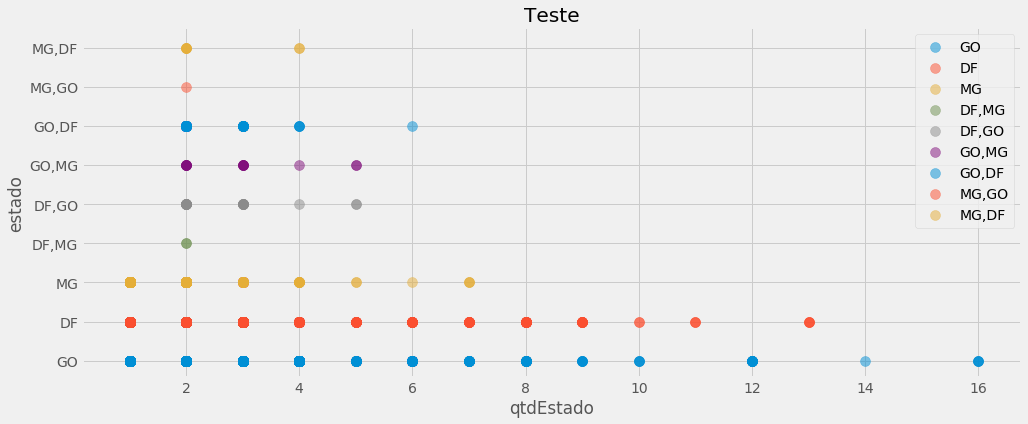

In [61]:
# Idade vs Renda Anual:
plt.figure(1 , figsize = (15 , 6))
for estado in ['GO','DF','MG','DF,MG','DF,GO','GO,MG','GO,DF','MG,GO','MG,DF']:
    plt.scatter(x = 'qtdEstado' , y = 'estado' , data = df[df['estado'] == estado] ,
                s = 100 , alpha = 0.5 , label = estado)
plt.xlabel('qtdEstado'), plt.ylabel('estado') 
plt.title('Teste')
plt.legend()
plt.show()